In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
import cv2
import os
from PIL import Image
from os import listdir
import numpy as np

Filename :  C.jpeg
Checking extension...
Path:  C:\Users\samkit\Tensorflow_Testing\IBM_Project\class_photo\C..jpg
Loading and Displaying image... 
Creating MTCNN object for detection...
Number of faces detected:  4


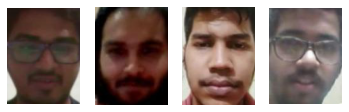

In [7]:
test_faces_path = os.getcwd()+'/test_faces/'
check = os.path.isdir(test_faces_path)
if (not check):
    os.mkdir(test_faces_path)

# draw each face separately
def draw_box(file, result_list):
    
    # load the image
    data = plt.imread(file)
    
    # plot each face as a subplot
    for i in range(len(result_list)):
        
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        
        # plot face
        plt.imshow(data[y1:y2, x1:x2])
        
        # check if directory is present or not - if not then creates one
        filename = 'img'+str(i)+'.jpg'

        #writes the detected faces in specified directory
        cv2.imwrite(test_faces_path+filename, data[y1:y2, x1:x2])
        
    # show the plot
    plt.show()

def convert_to_jpg(filename):
    im = Image.open(filename)
    rgb_im = im.convert('RGB')
    name = filename[:-4]+'.jpg'
    rgb_im.save(name)
    return name

PATH = os.getcwd()+"\\class_photo\\"
# print('Input Image Name')
files = os.listdir(PATH)
# print(files)
filename = files[0]
print('Filename : ',filename)

print('Checking extension...')
ext = filename[-3:]
if ext != 'jpg' :
    filename = convert_to_jpg(PATH+filename)

path = os.getcwd()+'\\class_photo\\'
path_img = os.path.join(path,filename)
print('Path: ',path_img)

print("Loading and Displaying image... ")
# load image from file
pixels = plt.imread(path_img)
# Displaying image
plt.imshow(pixels)

print("Creating MTCNN object for detection...")
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# print("Faces: ",faces)
print('Number of faces detected: ',len(faces))
# Deleting all previous images
# print(test_faces_path)
[os.remove(os.path.join(test_faces_path,file)) for file in os.listdir(test_faces_path) if file.endswith('.jpg')]

draw_box(path_img, faces)

In [5]:
# develop a classifier for the Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
import pickle

In [6]:
from keras.models import load_model

model = load_model('facenet_keras.h5')

class_model = pickle.load(open('svm_trained_classifier.pkl', 'rb'))

C:\Users\samkit\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
def load_faces(directory):
    test = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        # get face
        image = Image.open(path)
        image = image.convert('RGB')
        image = image.resize((160, 160))
        face_array = np.asarray(image)
        
        embeddings = get_embedding(model,face_array)
        # store
        test.append(embeddings)
    return np.asarray(test)

In [8]:
def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    #yhat =  model.embeddings(samples)
    yhat = model.predict(samples)
    return yhat[0]

In [9]:
directory = os.getcwd()+"/test_faces/"

test = load_faces(directory)

In [10]:
# normalize input vectors
in_encoder = Normalizer(norm='l2')
test = in_encoder.transform(test)

In [13]:
# load faces
data = load('faces-dataset.npz')
testX_faces = data['arr_2']
# print('testX_faces : ',testX_faces)
# load face embeddings
data = load('faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)

In [14]:
present_students = list()
for i in range(test.shape[0]):
    random_face_emb = test[i]
    random_face_emb = random_face_emb.reshape((128,))
    samples = expand_dims(random_face_emb, axis=0)
    # print(samples)
    # print(samples.shape)
    yhat_class = class_model.predict(samples)
    yhat_prob = class_model.predict_proba(samples)
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100

    predict_names = out_encoder.inverse_transform(yhat_class)
    # print(predict_names)
    #print('Predicted: ',predict_names,' (',str(class_probability[0])[1:7],')')
    present_students.append(predict_names[0])
#     print('Predicted ',i+1,' : ',predict_names)

In [15]:
present_students

['baccha',
 'Varun_Vasani',
 'Aryan Verma',
 'Samkit Saraf',
 'Varun Kumar Nyalapelli']

In [16]:
import datetime
import pandas as pd
import os


PATH = os.getcwd()+'\\dataset\\train\\'
student_names = os.listdir(PATH)
# print(student_names)

df = pd.DataFrame({"name":student_names})

df.insert(1,"attendance",0)

df['attendance'] = df['name'].apply(lambda x: 1 if x in present_students else 0)

PATH = os.getcwd()+"\\attendance_sheets\\"
if (not os.path.isdir(PATH)):
    os.mkdir(PATH)

df.to_excel(PATH+"attendance_sheet.xlsx", index=False)

['Aryan_Verma_B255', 'Samkit_Saraf_B241', 'Varun_Kumar_B245', 'Varun_Vasani_B252']


In [ ]:
PATH = os.getcwd()+"\\class_photo\\"
[os.remove(os.path.join(PATH,file)) for file in os.listdir(PATH)]
print('Deleted Screenshots!')

In [ ]:
# !pip install openpyxl